# Analýza hlavních komponent

## Úkol

- V datasetu Portland Housing Prices/Sales Jul 2020 - Jul 2021 zjistěte, jestli je zde problém multikolinearity.
- Proveďte analyzu hlavních komponent
- Vytvořte lineární model z PCA a model porovnejte s minulým cvičením

# Načtení dat

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')

In [20]:
data=data.dropna()

In [21]:
data.head()

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


# Analýza
- zobrazte data
- vyřešte NaN hodnoty
- zobrazte základní statistiky dat
- zobrazte korelační matici

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.DataFrame(data)

In [24]:
print("Data:")
print(df)

Data:
    bathrooms  bedrooms  livingArea  age    price
0           3         5        3470    7  1165000
1           4         5        3374   85  1050000
2           3         3        3265   20   442500
3           3         3        3192   36   765000
4           3         4        3157   73   815000
..        ...       ...         ...  ...      ...
95          1         3         838   72   250000
96          1         2         832   47   260000
97          1         2         812   46   220000
98          1         2         810   97   546500
99          1         1         766   83   370000

[100 rows x 5 columns]


In [25]:
if df.isnull().values.any():
    print("\nChybějící hodnoty byly nahrazeny průměrem příslušného sloupce.")
    df.fillna(df.mean(), inplace=True)

In [26]:
print("\nZákladní statistiky:")
print(df.describe())


Základní statistiky:
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06


In [27]:
correlation_matrix = df.corr()

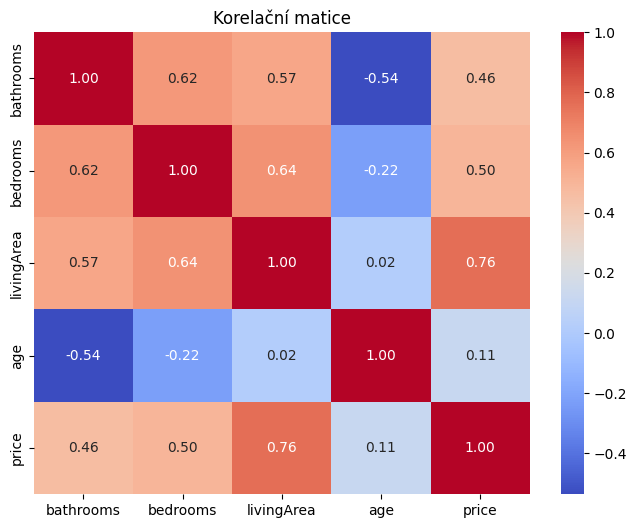

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice')
plt.show()

# Příprava dat
- vyberte X promenné bathrooms', 'bedrooms', 'livingArea','age','price'
- proměnné standardizujte

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(data)

In [35]:
X = df[['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']]

In [36]:
df_standardized = (df - df.mean()) / df.std()

In [37]:
print("Standardizovaná data:")
print(df_standardized)

Standardizovaná data:
    bathrooms  bedrooms  livingArea       age     price
0    0.739656  2.022985    2.254148 -1.308125  3.747400
1    1.932648  2.022985    2.109489  1.071394  3.079666
2    0.739656 -0.302285    1.945241 -0.911539 -0.447715
3    0.739656 -0.302285    1.835240 -0.423432  1.424845
4    0.739656  0.860350    1.782500  0.705314  1.715164
..        ...       ...         ...       ...       ...
95  -1.646330 -0.302285   -1.711918  0.674807 -1.565445
96  -1.646330 -1.464920   -1.720959 -0.087859 -1.507381
97  -1.646330 -1.464920   -1.751097 -0.118366 -1.739637
98  -1.646330 -1.464920   -1.754110  1.437474  0.156149
99  -1.646330 -2.627555   -1.820412  1.010380 -0.868678

[100 rows x 5 columns]


# Zobrazte VIF pro každou proměnnou

In [38]:
import numpy as np
from numpy.linalg import inv

In [39]:
def calculate_vif(X):
    X = np.array(X)
    vif = []
    for i in range(X.shape[1]):  # Opraveno na správný rozsah sloupců
        X_i = X[:, i]
        X_not_i = np.delete(X, i, axis=1)
        R_squared_i = np.corrcoef(X_i, X_not_i @ inv(X_not_i.T @ X_not_i) @ X_not_i.T @ X_i)[0, 1] ** 2
        vif.append(1 / (1 - R_squared_i))
    return vif

In [40]:
X = df.values
vif_values = calculate_vif(X)

In [41]:
vif_data = pd.DataFrame({
    'Variable': df.columns,
    'VIF': vif_values
})

In [42]:
print("VIF pro každou proměnnou:")
print(vif_data)

VIF pro každou proměnnou:
     Variable       VIF
0   bathrooms  2.618202
1    bedrooms  1.911230
2  livingArea  3.239817
3         age  1.347452
4       price  2.548419


# PCA
- Proveďte PCA
- zobrazte korelační matici

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(df)

In [45]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Vytvoření DataFrame s hlavními komponentami
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [46]:
correlation_matrix_pca = df_pca.corr()

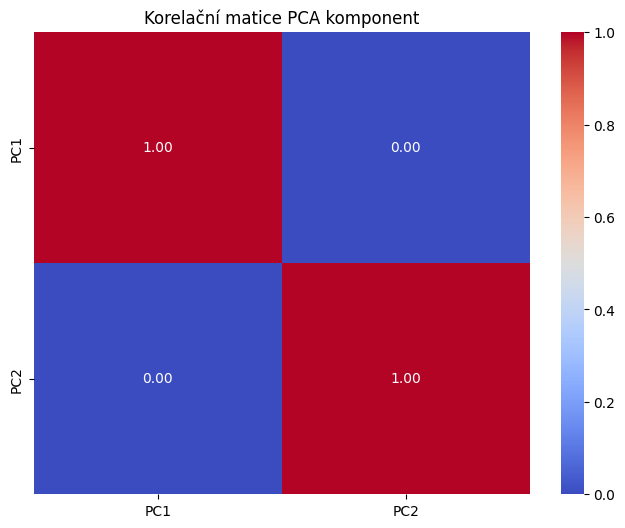

In [47]:

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice PCA komponent')
plt.show()

# Lineární model
- Vytvořte a natrénujte Lineární model pro PCA proměnné
- Zobrazte R2 a RMSE

In [48]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
scaler = StandardScaler()
X = df[['bathrooms', 'bedrooms', 'livingArea', 'age']]
y = df['price']
X_standardized = scaler.fit_transform(X)


In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Rozdělení dat na trénovací (80 %) a testovací (20 %) sadu
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)

# Vytvoření lineárního regresního modelu
model = LinearRegression()

# Trénování modelu na trénovací sadě
model.fit(X_train, y_train)

# Predikce na testovací sadě
y_pred = model.predict(X_test)

# Výpočet metrik R² a RMSE
r2 = r2_score(y_test, y_pred) if len(y_test) > 1 else float('nan')  # Ošetření pro malý počet testovacích dat

# Ruční výpočet RMSE (pokud squared=False není podporováno)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.56
RMSE: 132005.83
